In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importamos archivo a analizar
datacompleta = pd.read_csv('../../datos/procesados/limpieza01_argentina_delitos.csv')

In [3]:
#damos un primer vistazo general
datacompleta.head(5)

,Id_hecho,provincia,localidad,anio,mes,tipo_lugar,tipo_lugar_ampliado,motivo_origen_registro,fecha_hecho,hora_hecho,tipo_persona_id,tipo_persona,sexo_victima,tr_edad_victima,clase_victima,sexo_inculpado,tr_edad_inculpado,relacion_inculpado_victima,relacion_victima_inculpado,cant_vic
0,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12929,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,1
1,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12930,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,1
2,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12931,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,1
3,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Víctima idRegistro 12235,Víctima,Masculino,45-49,Civil,No corresponde,No corresponde,No corresponde,Sin relación,1
4,11536,NEUQUEN,Cutral Có,2017,1,Vía pública,Vía pública,Intervención policial,7/1/2017,10:35:00,Imputado idRegistro 12932,Imputado,No corresponde,No corresponde,No corresponde,Masculino,30-34,Sin relación,No corresponde,1


In [4]:
datacompleta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Id_hecho                    25160 non-null  int64 
 1   provincia                   25160 non-null  object
 2   localidad                   25160 non-null  object
 3   anio                        25160 non-null  int64 
 4   mes                         25160 non-null  int64 
 5   tipo_lugar                  25160 non-null  object
 6   tipo_lugar_ampliado         25160 non-null  object
 7   motivo_origen_registro      25160 non-null  object
 8   fecha_hecho                 25160 non-null  object
 9   hora_hecho                  25160 non-null  object
 10  tipo_persona_id             25160 non-null  object
 11  tipo_persona                25160 non-null  object
 12  sexo_victima                25160 non-null  object
 13  tr_edad_victima             25160 non-null  ob

Las variables de nuestro dataset son categoricas en su mayoria, a excepción de fecha y hora, por lo tanto, no tendría sentido realizar analisis de tendencias. 

Vamos a filtrar el dataset por ID hecho, para poder analizar sin duplicados las variables en las cuales estamos interesados.

In [5]:
#vamos a tomar un registro de cada hecho, para explorar provincia, año, lugar, sin repetir información

hechos_sinduplicados = datacompleta.drop_duplicates(subset='Id_hecho').copy()
hechos_sinduplicados.head(5)


,Id_hecho,provincia,localidad,anio,mes,tipo_lugar,tipo_lugar_ampliado,motivo_origen_registro,fecha_hecho,hora_hecho,tipo_persona_id,tipo_persona,sexo_victima,tr_edad_victima,clase_victima,sexo_inculpado,tr_edad_inculpado,relacion_inculpado_victima,relacion_victima_inculpado,cant_vic
0,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12929,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,1
4,11536,NEUQUEN,Cutral Có,2017,1,Vía pública,Vía pública,Intervención policial,7/1/2017,10:35:00,Imputado idRegistro 12932,Imputado,No corresponde,No corresponde,No corresponde,Masculino,30-34,Sin relación,No corresponde,1
7,11537,NEUQUEN,Neuquén,2017,1,Vía pública,Vía pública,Intervención policial,7/1/2017,16:38:00,Imputado idRegistro 12934,Imputado,No corresponde,No corresponde,No corresponde,Masculino,25-29,Sin relación,No corresponde,1
9,11538,NEUQUEN,Barrancas,2017,1,Domicilio particular,Domicilio particular,Intervención policial,2/1/2017,22:00:00,Imputado idRegistro 12935,Imputado,No corresponde,No corresponde,No corresponde,Masculino,35-39,Hijo/a,No corresponde,1
11,11539,NEUQUEN,Neuquén,2017,4,Vía pública,Vía pública,Intervención policial,3/4/2017,23:55:00,Imputado idRegistro 12936,Imputado,No corresponde,No corresponde,No corresponde,Masculino,25-29,Sin relación,No corresponde,1


Visualizamos la distribución realizando un conteo de hecho delictivos durante el transcurso de los años. Se encuentra una distribucion uniforme, es decir, el número de delitos por año es similar, aunque con un poco de baja en 2021.

In [6]:
#hechos delictivos por año
conteo = hechos_sinduplicados.groupby('anio')['Id_hecho'].count()
conteo

anio
2017    2224
2018    2282
2019    2238
2020    2348
2021    2020
Name: Id_hecho, dtype: int64

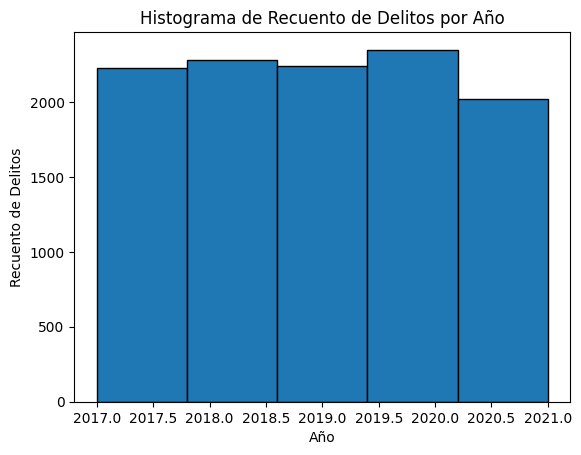

In [7]:
conteo_por_anio = hechos_sinduplicados.groupby('anio')['Id_hecho'].count()

fig, ax = plt.subplots()
ax.hist(hechos_sinduplicados['anio'], bins=len(conteo_por_anio), edgecolor='black')
ax.set_xlabel('Año')
ax.set_ylabel('Recuento de Delitos')
ax.set_title('Histograma de Recuento de Delitos por Año')

plt.show()

Ya que notamos una baja en 2021, vamos a corroborar que ese año tenga los datos de todos los meses del año, que este completo. Y si, es asi. 

In [8]:
conteo = hechos_sinduplicados[hechos_sinduplicados['anio'] == '2021'].groupby('mes')['Id_hecho'].count()
conteo

Series([], Name: Id_hecho, dtype: int64)

Visualizamos la districbución realizando un conteo de hecho delictivos durante los meses de todos estos años. Se encuentra una distribucion Bimodal, es decir, la mayor cantidad de delitos fueron cometidos en los primeros y ultimos meses del año. 

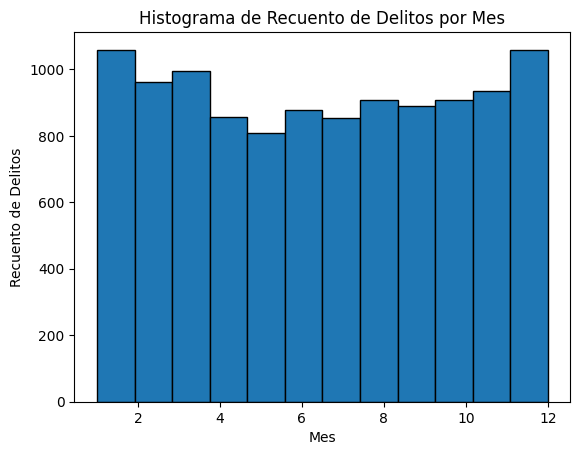

In [9]:
conteo_por_mes = hechos_sinduplicados.groupby('mes')['Id_hecho'].count()
conteo_por_mes = conteo_por_mes.sort_values(ascending=True)

fig, ax = plt.subplots()
ax.hist(hechos_sinduplicados['mes'], bins=len(conteo_por_mes), edgecolor='black')
ax.set_xlabel('Mes')
ax.set_ylabel('Recuento de Delitos')
ax.set_title('Histograma de Recuento de Delitos por Mes')

plt.show()

Se agrega columna nueva para analizar la variable Hora. 

In [10]:
hechos_sinduplicados["Horaok"] = hechos_sinduplicados['hora_hecho'].apply(lambda x: x[:2])

conteo = hechos_sinduplicados.groupby('Horaok')['Id_hecho'].count()
conteo.sort_values(ascending=False)

Horaok
11    4826
00     469
22     437
21     429
23     373
20     372
19     307
05     303
01     290
18     282
06     281
02     265
04     265
03     243
16     220
17     212
07     211
12     202
08     202
15     201
14     199
13     190
10     179
09     154
Name: Id_hecho, dtype: int64

Vemos un pico de delitos en el horario de las 11am. Indagamos un poco más a ver si es un dato erroneo. 

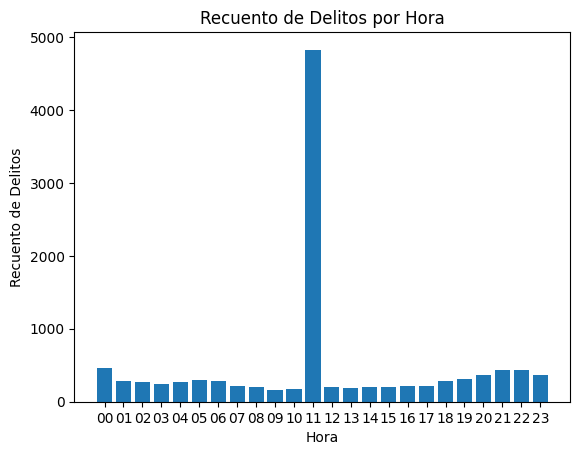

In [11]:
fig, ax = plt.subplots()

ax.bar(conteo.index, conteo.values)

ax.set_title('Recuento de Delitos por Hora')
ax.set_xlabel('Hora')
ax.set_ylabel('Recuento de Delitos')

plt.show()

Se visualiza que la cantidad de delitos a las 11 de la mañana se mantiene en todos los meses, deducimos de esta manera, que no es un dato con error.

In [12]:
hechos_sinduplicados[hechos_sinduplicados['Horaok'] == '11'].groupby('mes')['Id_hecho'].count()


mes
1     473
2     416
3     463
4     353
5     338
6     389
7     347
8     432
9     377
10    397
11    403
12    438
Name: Id_hecho, dtype: int64

In [13]:
hechos_sinduplicados[hechos_sinduplicados['Horaok'] == '11'].groupby('provincia')['Id_hecho'].count()

provincia
BUENOS AIRES              4500
CHACO                        9
CHUBUT                       9
CIUDAD DE BUENOS AIRES      50
CORDOBA                     32
CORRIENTES                   4
ENTRE RIOS                  22
FORMOSA                      2
JUJUY                        8
LA PAMPA                     2
LA RIOJA                     1
MENDOZA                     23
MISIONES                     9
NEUQUEN                      7
RIO NEGRO                   29
SALTA                        9
SAN JUAN                     2
SAN LUIS                     1
SANTA CRUZ                   3
SANTA FE                    66
SANTIAGO DEL ESTERO         22
TIERRA DEL FUEGO             1
TUCUMÁN                     15
Name: Id_hecho, dtype: int64

¿En que provincias hubo mas delitos reportados?

In [14]:
#recuento por provincia ?

conteo = hechos_sinduplicados.groupby('provincia')['Id_hecho'].count()

conteo.sort_values(ascending=False)

provincia
BUENOS AIRES              4502
SANTA FE                  1637
TUCUMÁN                    635
CIUDAD DE BUENOS AIRES     583
CORDOBA                    541
MENDOZA                    456
SALTA                      385
CHACO                      345
ENTRE RIOS                 275
MISIONES                   254
CHUBUT                     200
SANTIAGO DEL ESTERO        182
CORRIENTES                 180
NEUQUEN                    177
FORMOSA                    177
RIO NEGRO                  139
JUJUY                      122
SAN JUAN                    73
SANTA CRUZ                  66
SAN LUIS                    54
CATAMARCA                   48
LA PAMPA                    33
LA RIOJA                    33
TIERRA DEL FUEGO            15
Name: Id_hecho, dtype: int64

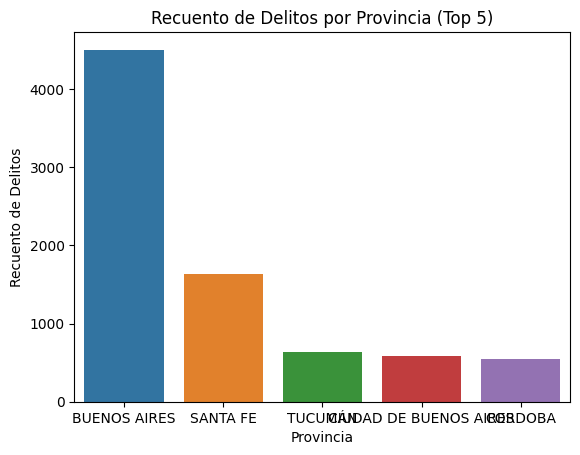

<Figure size 4000x1000 with 0 Axes>

In [15]:
conteo = hechos_sinduplicados.groupby('provincia')['Id_hecho'].count().reset_index()

# Ordenar las provincias por el recuento de delitos de forma descendente
top_provincias = conteo.nlargest(5, 'Id_hecho')

# Crear el gráfico de barras para las 5 provincias con mayor cantidad de delitos
fig, ax = plt.subplots()
sns.barplot(x='provincia', y='Id_hecho', data=top_provincias, ax=ax)
ax.set_xlabel('Provincia')
ax.set_ylabel('Recuento de Delitos')
ax.set_title('Recuento de Delitos por Provincia (Top 5)')
fig = plt.figure(figsize=(40, 10))

plt.show()

¿Cuales son los tipos de lugares más recurrentes?

In [16]:
conteo = hechos_sinduplicados.groupby('tipo_lugar')['Id_hecho'].count()
conteo.sort_values(ascending=False)

tipo_lugar
Vía pública             5641
Domicilio particular    3243
Sin determinar          1358
Otro lugar               390
Comercio                 249
Interior de rodados      140
Carcel o comisaría        91
Name: Id_hecho, dtype: int64

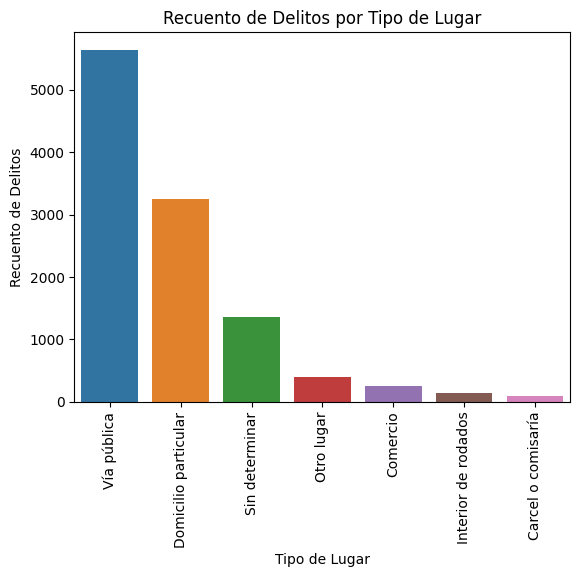

In [17]:
conteo = hechos_sinduplicados.groupby('tipo_lugar')['Id_hecho'].count().sort_values(ascending=False)

fig, ax = plt.subplots()
sns.barplot(x=conteo.index, y=conteo.values, ax=ax)
ax.set_xlabel('Tipo de Lugar')
ax.set_ylabel('Recuento de Delitos')
ax.set_title('Recuento de Delitos por Tipo de Lugar')

plt.xticks(rotation=90)  

plt.show()

Teniendo en cuenta que a las 11am hay un pico de delitos, y es en Buenos Aires, se corresponde a algun lugar en particular?

In [18]:
conteo = hechos_sinduplicados.loc[(hechos_sinduplicados['Horaok'] == '11') & (hechos_sinduplicados['provincia'] == 'BUENOS AIRES')].groupby('tipo_lugar')['Id_hecho'].count()
conteo.sort_values(ascending=False)

tipo_lugar
Vía pública             1831
Sin determinar          1292
Domicilio particular    1022
Comercio                 123
Otro lugar               119
Interior de rodados       85
Carcel o comisaría        28
Name: Id_hecho, dtype: int64

Como las variables son categoricas, se realizará correlacion de spearman

In [19]:
from scipy.stats import spearmanr

subset_columns = ['provincia', 'mes', 'anio', 'tipo_lugar', 'motivo_origen_registro', 'Horaok']
correlation_matrix, p_values = spearmanr(hechos_sinduplicados[subset_columns])

print(correlation_matrix)

[[ 1.          0.00676281  0.02635972  0.06721199  0.24517996  0.07162785]
 [ 0.00676281  1.          0.01426638 -0.01159909  0.01006047  0.01669638]
 [ 0.02635972  0.01426638  1.          0.01588604  0.36392225  0.01255708]
 [ 0.06721199 -0.01159909  0.01588604  1.          0.05907482  0.00557662]
 [ 0.24517996  0.01006047  0.36392225  0.05907482  1.          0.03433218]
 [ 0.07162785  0.01669638  0.01255708  0.00557662  0.03433218  1.        ]]


Los resultados indican una correlación leve entre provincia y motivo de origen. También mismo tipo de relación aunque un poco más fuerte entre Año y Motivo de Origen. 
